# 2024-03-25 38 - Explore generalization gap.ipynb
What if we compute the generalization gap (train vs test MSE) and figure out if there's a relationship between MCV changes and generalization gap.

Motivated by Koopa not changing much.

## Parameters

**WIP**

## Libraries and setup

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), os.pardir)))

In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Markdown, display

In [5]:
from utils import wandb_utils

## Data Download

In [8]:
from utils import wandb_utils
# Todo save in a file

df = wandb_utils.get_experiment_data("Autoformer","alelab",["e22_icml_koopa_erm","e24_icml_koopa_constrained_val","e23_icml_koopa_constrained_train"])

  0%|          | 0/47 [00:00<?, ?it/s]

WARNING!! Missing pointwise/cvar/0.01 in run n72ckpos on sweep <Sweep alelab/Autoformer/cnp2jg8w (FINISHED)>. Filling all poitwisewith NAN.


  2%|▏         | 1/47 [00:14<10:47, 14.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run fuyhlvkv on sweep <Sweep alelab/Autoformer/cnp2jg8w (FINISHED)>. Filling all poitwisewith NAN.


  4%|▍         | 2/47 [00:27<10:24, 13.88s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5v2usa3h on sweep <Sweep alelab/Autoformer/cnp2jg8w (FINISHED)>. Filling all poitwisewith NAN.


  6%|▋         | 3/47 [00:42<10:29, 14.31s/it]

WARNING!! Missing pointwise/cvar/0.01 in run epi71mu7 on sweep <Sweep alelab/Autoformer/jivukxet (FINISHED)>. Filling all poitwisewith NAN.


  9%|▊         | 4/47 [00:49<08:00, 11.19s/it]

WARNING!! Missing pointwise/cvar/0.01 in run e7uxpz7v on sweep <Sweep alelab/Autoformer/jivukxet (FINISHED)>. Filling all poitwisewith NAN.


 11%|█         | 5/47 [00:55<06:36,  9.44s/it]

WARNING!! Missing pointwise/cvar/0.01 in run bytcjpcj on sweep <Sweep alelab/Autoformer/jivukxet (FINISHED)>. Filling all poitwisewith NAN.


 13%|█▎        | 6/47 [01:01<05:44,  8.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run zqrph9ka on sweep <Sweep alelab/Autoformer/19l639sk (FINISHED)>. Filling all poitwisewith NAN.


 15%|█▍        | 7/47 [01:05<04:33,  6.83s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3ajxu817 on sweep <Sweep alelab/Autoformer/19l639sk (FINISHED)>. Filling all poitwisewith NAN.


 17%|█▋        | 8/47 [01:08<03:46,  5.81s/it]

WARNING!! Missing pointwise/cvar/0.01 in run van88i01 on sweep <Sweep alelab/Autoformer/19l639sk (FINISHED)>. Filling all poitwisewith NAN.


 19%|█▉        | 9/47 [01:12<03:15,  5.13s/it]

WARNING!! Missing pointwise/cvar/0.01 in run am67j7kj on sweep <Sweep alelab/Autoformer/og78bjl8 (FINISHED)>. Filling all poitwisewith NAN.


 21%|██▏       | 10/47 [01:14<02:32,  4.11s/it]

WARNING!! Missing pointwise/cvar/0.01 in run x3govr62 on sweep <Sweep alelab/Autoformer/og78bjl8 (FINISHED)>. Filling all poitwisewith NAN.


 23%|██▎       | 11/47 [01:17<02:12,  3.69s/it]

WARNING!! Missing pointwise/cvar/0.01 in run phas570f on sweep <Sweep alelab/Autoformer/og78bjl8 (FINISHED)>. Filling all poitwisewith NAN.


 26%|██▌       | 12/47 [01:18<01:49,  3.12s/it]

WARNING!! Missing pointwise/cvar/0.01 in run oy0urglk on sweep <Sweep alelab/Autoformer/sq77bdqs (FINISHED)>. Filling all poitwisewith NAN.


 28%|██▊       | 13/47 [01:32<03:34,  6.30s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hs1vtc13 on sweep <Sweep alelab/Autoformer/sq77bdqs (FINISHED)>. Filling all poitwisewith NAN.


 30%|██▉       | 14/47 [01:46<04:40,  8.51s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 5yrf01q2 on sweep <Sweep alelab/Autoformer/h1424jz0 (FINISHED)>. Filling all poitwisewith NAN.


 32%|███▏      | 15/47 [01:52<04:11,  7.85s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 074bb1au on sweep <Sweep alelab/Autoformer/h1424jz0 (FINISHED)>. Filling all poitwisewith NAN.


 34%|███▍      | 16/47 [01:58<03:49,  7.39s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qy6yzdlu on sweep <Sweep alelab/Autoformer/h1424jz0 (FINISHED)>. Filling all poitwisewith NAN.


 36%|███▌      | 17/47 [02:06<03:39,  7.32s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 8yqqvnoe on sweep <Sweep alelab/Autoformer/hn2et30y (FINISHED)>. Filling all poitwisewith NAN.


 38%|███▊      | 18/47 [02:09<02:59,  6.20s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2c8ms6fa on sweep <Sweep alelab/Autoformer/hn2et30y (FINISHED)>. Filling all poitwisewith NAN.


 40%|████      | 19/47 [02:13<02:31,  5.42s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3f66kilu on sweep <Sweep alelab/Autoformer/hn2et30y (FINISHED)>. Filling all poitwisewith NAN.


 43%|████▎     | 20/47 [02:16<02:11,  4.87s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xtn7wajb on sweep <Sweep alelab/Autoformer/xe7msqxx (FINISHED)>. Filling all poitwisewith NAN.


 45%|████▍     | 21/47 [02:18<01:42,  3.95s/it]

WARNING!! Missing pointwise/cvar/0.01 in run lylrg5mv on sweep <Sweep alelab/Autoformer/xe7msqxx (FINISHED)>. Filling all poitwisewith NAN.


 47%|████▋     | 22/47 [02:20<01:22,  3.31s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1wycgzxa on sweep <Sweep alelab/Autoformer/xe7msqxx (FINISHED)>. Filling all poitwisewith NAN.


 49%|████▉     | 23/47 [02:22<01:08,  2.86s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 9ydv0s0k on sweep <Sweep alelab/Autoformer/srz5xa9h (FINISHED)>. Filling all poitwisewith NAN.


 51%|█████     | 24/47 [02:35<02:19,  6.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ewgnqfyf on sweep <Sweep alelab/Autoformer/srz5xa9h (FINISHED)>. Filling all poitwisewith NAN.


 53%|█████▎    | 25/47 [02:50<03:08,  8.58s/it]

WARNING!! Missing pointwise/cvar/0.01 in run kvopvvil on sweep <Sweep alelab/Autoformer/srz5xa9h (FINISHED)>. Filling all poitwisewith NAN.


 55%|█████▌    | 26/47 [03:03<03:31, 10.07s/it]

WARNING!! Missing pointwise/cvar/0.01 in run wljus9un on sweep <Sweep alelab/Autoformer/q6l1lnp4 (FINISHED)>. Filling all poitwisewith NAN.


 57%|█████▋    | 27/47 [03:10<02:59,  8.96s/it]

WARNING!! Missing pointwise/cvar/0.01 in run hl2rx5w8 on sweep <Sweep alelab/Autoformer/q6l1lnp4 (FINISHED)>. Filling all poitwisewith NAN.


 60%|█████▉    | 28/47 [03:16<02:35,  8.17s/it]

WARNING!! Missing pointwise/cvar/0.01 in run xziaepnc on sweep <Sweep alelab/Autoformer/q6l1lnp4 (FINISHED)>. Filling all poitwisewith NAN.


 62%|██████▏   | 29/47 [03:22<02:17,  7.61s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1vlncitm on sweep <Sweep alelab/Autoformer/5ym7260n (FINISHED)>. Filling all poitwisewith NAN.


 64%|██████▍   | 30/47 [03:26<01:49,  6.41s/it]

WARNING!! Missing pointwise/cvar/0.01 in run l45dkb7n on sweep <Sweep alelab/Autoformer/5ym7260n (FINISHED)>. Filling all poitwisewith NAN.


 66%|██████▌   | 31/47 [03:29<01:29,  5.57s/it]

WARNING!! Missing pointwise/cvar/0.01 in run q0ykmafz on sweep <Sweep alelab/Autoformer/5ym7260n (FINISHED)>. Filling all poitwisewith NAN.


 68%|██████▊   | 32/47 [03:33<01:14,  4.99s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2astnaq8 on sweep <Sweep alelab/Autoformer/akjrmas7 (FINISHED)>. Filling all poitwisewith NAN.


 70%|███████   | 33/47 [03:36<01:00,  4.31s/it]

WARNING!! Missing pointwise/cvar/0.01 in run qbjdfai0 on sweep <Sweep alelab/Autoformer/akjrmas7 (FINISHED)>. Filling all poitwisewith NAN.


 72%|███████▏  | 34/47 [03:38<00:46,  3.56s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 3m5lbdkb on sweep <Sweep alelab/Autoformer/akjrmas7 (FINISHED)>. Filling all poitwisewith NAN.


 74%|███████▍  | 35/47 [03:39<00:36,  3.03s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 66mvasr3 on sweep <Sweep alelab/Autoformer/2w8lanj6 (FINISHED)>. Filling all poitwisewith NAN.


 77%|███████▋  | 36/47 [03:53<01:08,  6.22s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 80kt8tnk on sweep <Sweep alelab/Autoformer/2w8lanj6 (FINISHED)>. Filling all poitwisewith NAN.


 79%|███████▊  | 37/47 [03:59<01:02,  6.27s/it]

WARNING!! Missing pointwise/cvar/0.01 in run dqrify58 on sweep <Sweep alelab/Autoformer/2w8lanj6 (FINISHED)>. Filling all poitwisewith NAN.


 81%|████████  | 38/47 [04:03<00:49,  5.48s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 1nfttlo9 on sweep <Sweep alelab/Autoformer/2w8lanj6 (FINISHED)>. Filling all poitwisewith NAN.


 83%|████████▎ | 39/47 [04:05<00:35,  4.38s/it]

WARNING!! Missing pointwise/cvar/0.01 in run q2my86s3 on sweep <Sweep alelab/Autoformer/zkhcu03l (FINISHED)>. Filling all poitwisewith NAN.


 85%|████████▌ | 40/47 [04:19<00:50,  7.16s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 0zhsfaz5 on sweep <Sweep alelab/Autoformer/zkhcu03l (FINISHED)>. Filling all poitwisewith NAN.


 87%|████████▋ | 41/47 [04:26<00:43,  7.19s/it]

WARNING!! Missing pointwise/cvar/0.01 in run h4gs816b on sweep <Sweep alelab/Autoformer/zkhcu03l (FINISHED)>. Filling all poitwisewith NAN.


 89%|████████▉ | 42/47 [04:30<00:30,  6.13s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 6hy9ulep on sweep <Sweep alelab/Autoformer/zkhcu03l (FINISHED)>. Filling all poitwisewith NAN.


 91%|█████████▏| 43/47 [04:31<00:19,  4.85s/it]

WARNING!! Missing pointwise/cvar/0.01 in run 2e50w3di on sweep <Sweep alelab/Autoformer/y680469o (FINISHED)>. Filling all poitwisewith NAN.


 94%|█████████▎| 44/47 [04:45<00:22,  7.49s/it]

WARNING!! Missing pointwise/cvar/0.01 in run nfvvpkw4 on sweep <Sweep alelab/Autoformer/y680469o (FINISHED)>. Filling all poitwisewith NAN.


 96%|█████████▌| 45/47 [04:51<00:14,  7.15s/it]

WARNING!! Missing pointwise/cvar/0.01 in run vxrdupdp on sweep <Sweep alelab/Autoformer/y680469o (FINISHED)>. Filling all poitwisewith NAN.


 98%|█████████▊| 46/47 [04:55<00:06,  6.10s/it]

WARNING!! Missing pointwise/cvar/0.01 in run ltix2ikk on sweep <Sweep alelab/Autoformer/y680469o (FINISHED)>. Filling all poitwisewith NAN.


100%|██████████| 47/47 [04:57<00:00,  6.33s/it]


Fetched 47 runs
Total records: (46224, 112)
Total runs: 47


In [9]:
# df.to_pickle("../data_backups/2024_03_26__icml_rebuttals_koopa_all.pkl")
# df.to_csv("../data_backups/2024_03_26__icml_rebuttals_koopa_all.csv",index=False)

Add the cached runs from older models

In [11]:
backup_df = pd.read_pickle("../data_backups/2024_02_01_1038am__icml_backup_data.pkl")
df = pd.concat([df,backup_df],axis=0)

In [30]:
df["constraint_violation"] = (df.mse-df.constraint_level).clip(lower=0)
df['is_infeasible'] = (df.constraint_violation>0)*1

## Compute generalization gap

In [69]:
#df['generalization_gap'] = df['mse/train'] - df['mse/test']
train_df = df.query("split == 'train'")#[['run_id','step','mse']]
test_df = df.query("split == 'test'")#[['run_id','step','mse']]

# merge by run id
mse_train_vs_test=train_df.merge(test_df, on=['run_id','step','constraint_type','constraint_level','data_path','model','pred_len'], suffixes=('_train', '_test'))
mse_train_vs_test['mse_diff'] = mse_train_vs_test['mse_test'] - mse_train_vs_test['mse_train']

/home/jporras/miniconda3/envs/autoformer/lib/python3.7/site-packages/ipykernel_launcher.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  import sys


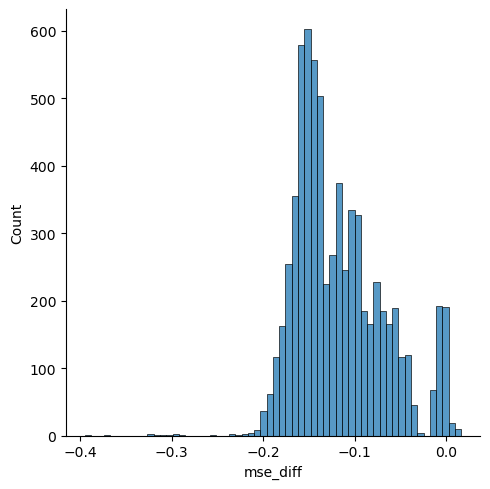

In [70]:
sns.displot(sample.mse_diff)

## Compare constraint violation vs mse_diff

In [92]:
df.query('model=="Koopa" and data_path=="electricity.csv"')[['run_id','model','pred_len','constraint_level','data_path']].drop_duplicates().sort_values(['pred_len','constraint_level'])

,run_id,model,pred_len,constraint_level,data_path
41904,6hy9ulep,Koopa,96,-1.000,electricity.csv
21744,1wycgzxa,Koopa,96,0.136,electricity.csv
21456,lylrg5mv,Koopa,96,0.148,electricity.csv
21168,xtn7wajb,Koopa,96,0.151,electricity.csv
41328,h4gs816b,Koopa,192,-1.000,electricity.csv
20592,3f66kilu,Koopa,192,0.154,electricity.csv
20016,2c8ms6fa,Koopa,192,0.160,electricity.csv
19440,8yqqvnoe,Koopa,192,0.165,electricity.csv
40320,0zhsfaz5,Koopa,336,-1.000,electricity.csv
18432,qy6yzdlu,Koopa,336,0.156,electricity.csv


In [102]:
sample['pointwise/std_test']

7056     NaN
7057     NaN
7058     NaN
7059     NaN
7060     NaN
          ..
281035   NaN
281036   NaN
281037   NaN
281038   NaN
281039   NaN
Name: pointwise/std_test, Length: 6912, dtype: float64

In [94]:
sample = mse_train_vs_test.query("data_path=='electricity.csv' and pred_len==96")
summary= sample \
    .query('constraint_type=="constant" or constraint_type=="constant_resilience"') \
    .groupby(['data_path','model','pred_len','constraint_level'])[['mse_train','mse_test','mse_diff','constraint_violation_test']].mean() \
    .reset_index()
# Top diffs
display(Markdown("**TOP DIFFS**"))
display(summary.sort_values(by='mse_diff',ascending=False).head(10))
# bottom diffs
display(Markdown("**BOTTOM DIFFS**"))
display(summary.sort_values(by='mse_diff',ascending=True).head(10))
# g = sns.scatterplot(data=summary,x='mse_diff',y='constraint_violation_test',hue='model')
# g.set_title('Generalization gap vs constraint violation')
# g = sns.scatterplot(data=summary,x='mse_test',y='constraint_violation_test',hue='model')
# g.set_title('MSE Test vs constraint violation Test')
g = sns.scatterplot(data=summary,x='std_test',y='constraint_violation_test',hue='model')
g.set_title('MSE Test vs constraint violation Test')

KeyError: "Columns not found: 'std_test', 'std_train'"